# **Time in the market - but how long is long enough?**
***Disclaimer:*** *Nothing written here is financial advice. Past performance does not guarantee future results.*



---



Once you start reading about investments and hearing about someone that is getting good returns, you might start thinking about using some of the money you saved up to invest in the market and get some of the returns you see people getting.

You hear about ETFs which are one of the most used investment instruments.

You might also come across with one particular financial quote from Ken Fisher:

>**"Time in the market beats timing the market."**

Warren Buffet also says:

>**“Our favorite holding period is forever.”**

This is because nobody is able to predict the future of the market on the short-term. But you can expect that the market will grow long-term and use that to your advantage, despite all the volatility you might encounter.

So yes, holding for a long period of time works, but that is not the scope of this analysis. **The goal is to find out how long should this period be. How long should we wait to guarantee we don't see any red on our portfolio.**

To do this we'll look into 5 different assets: **2 Exchange-Traded Funds (ETF), 1 Stock, 1 Cryptocurrency and 1 Commodity**. We'll find out how long it took to comeback from a negative return (breakeven) in the worst cases and how the percentage of negative returns changed over time.

Investing should be a way to try to beat inflation, trying to keep or increase the value of our money over time, so we'll take a look into inflation and consider that as the reference to breakeven and check again the worst cases and how the percentage of negative returns varied.

Finally, we'll try to find out if there is a way to improve the chances of not getting negative returns or at least decrease the breakeven duration.





## **Tasks**


Bellow you'll find a list with the tasks for this analysis.

*   Load and clean data
*   Plot price charts
*   Transform and create data for different holding periods
*   Plot ROI comparing it with the holding period
*   Compare the breakeven holding period between assets
*   Calculate and plot annualized return and compare it against inflation
*   Historically what were the best and worst times to enter the market
*   Correlation between features to find if there is a way to improve breakeven duration




---


## **Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---



## **Overview of the Data**

As stated before, we'll consider **2 ETFs, 1 Stock, 1 Cryptocurrency and 1 commodity**. The reason is I wanted to consider some of the most mature and favorite assets for the beginner investor. 

We want to follow the mindset of the average person that just started investing, so naturally we want to consider non-leveraged and safer assets. 

Experienced investors on the other hand might prefer riskier investments, but this is outside the scope. I think with Bitcoin and Gold we might be off the safer and favorite route, but nevertheless I wanted to see what kind of results we would get. 

The data was exported grouped weekly. A daily price action would be more important for trading rather than investing. For the latter, a weekly period is more relevant.

1.   **ETF** - [iShares Core S&P 500 UCITS ETF USD (Acc) (CSSPX)](https://www.investing.com/etfs/cs-etf-(ie)-on-s-p-500?cid=46891)

**Period:** 30/05/2010 - 30/01/2022

>One of the most beloved ETF. The S&P500 index follows the best 500 stocks from EUA. The job of this ETF is to match and follow that index. 

2.   **ETF** - [iShares Core MSCI World UCITS ETF USD (Acc) (IWDA)](https://www.investing.com/etfs/ishares-msci-world---acc?cid=47285)

**Period:** 18/10/2009 - 30/01/2022

>This ETF tracks the large and mid-cap across 23 developed market countries with around 1500 stocks.

3.   **Stock** - [Microsoft (MSFT)](https://www.investing.com/equities/microsoft-corp?cid=29399)

**Period:** 12/04/2009 - 30/01/2022

>One of the most profitable companies.

4.   **Cryptocurrency** - [Bitcoin (BTC)](https://www.investing.com/crypto/bitcoin?cid=1057388)

**Period:** 28/08/2011 - 30/01/2022

>The token that started crypto as we know today. 

5.   **Commodity** - [Gold](https://www.investing.com/etfs/xetra-gold)

**Period:** 06/01/2008 - 30/01/2022

>There are several ways to invest in gold: buying the material, invest in an ETF that tracks its value or buying stocks of gold mining companies. Here we're using an etf, being it the easiest way.


**Note:** All data taken from an european exchange (EUR as currency), to avoid including any unwanted variabilities due to currency exchange.  

The data as you can see in the table (Bitcoin as example) below consists in: 
- **`Date`** - the date grouped by weeks. The date written corresponds to Sunday.
- **`Price`** - the price at which the asset closed the week at
- **`Open`** - The price at which the asset opened the week at
- **`High`** - the highest the price got during that week
- **`Low`** - the lowest the price got during that week
- **`Vol.`** - the transaction volume for the week
- **`Change %`** - the percentual change in price between the open and the close of the week


In [4]:
df_btc = pd.read_csv("bitcoin_data.csv")
df_btc.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 28, 2011",5.8,6.1,6.4,5.7,0.02K,-5.05%
1,"Sep 04, 2011",3.5,5.8,5.8,3.1,1.87K,-40.14%
2,"Sep 11, 2011",3.6,3.5,5.0,3.3,5.87K,2.29%
3,"Sep 18, 2011",4.1,3.6,5.1,3.5,13.48K,14.85%
4,"Sep 25, 2011",3.8,4.1,4.1,3.5,6.86K,-7.07%


The datatype for the columns in this table in particular is object, which is not really useful for operations and ploting. Next step we'll cover the process of importing data and cleaning it, converting into data types such as strings, datetime, float, integer.

In [5]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      545 non-null    object
 1   Price     545 non-null    object
 2   Open      545 non-null    object
 3   High      545 non-null    object
 4   Low       545 non-null    object
 5   Vol.      545 non-null    object
 6   Change %  545 non-null    object
dtypes: object(7)
memory usage: 29.9+ KB




---


## **Importing and cleaning data**

So, first step is importing the data and clean it. There are somethings to be done before we can use this data for our analysis.

After looking through the data, data types and formats, this is our to-do list:

**Convert 1,000.00 format to 1000.00**

>*This happens in the Bitcoin table where price gets to the thousands and it's not possible to convert the current format (e.g. 1,000.00) into float, so we can't use it this way for any kind of operations.*

**Transform `Date` data type into datetime**

>*We have to convert data type from object into datetime.*

**Remove % sign in `Change %` and convert type to float**

>*We need to remove the % sign in order to be able to convert this column into a float.*

**Replace 1M, 1K into 1e6 and 1e3, and also - to 0 in `Vol.`**

>*We have to convert the current format to a numeric form in order to be able to use it in operations.*

**Convert `Asset` data type into string**

>*After concatenating all the tables into a single one, this column get a date type of object. We have to convert it to string.*

In [6]:
#Import S&P500 data
df_sp = pd.read_csv("sp500_data.csv")
df_sp['Asset']='S&P500'

#Import MSCI World data
df_world = pd.read_csv("world_data.csv")
df_world['Asset']='World'

#Import Microsoft data
df_msft = pd.read_csv("msft_data.csv")
df_msft['Asset']='MSFT'

#Import Bitcoin data
df_btc = pd.read_csv("bitcoin_data.csv")
df_btc['Asset']='Bitcoin'
df_btc['Price'] = df_btc['Price'].str.replace(',', '').astype('float')
df_btc['Open'] = df_btc['Open'].str.replace(',', '').astype('float')
df_btc['High'] = df_btc['High'].str.replace(',', '').astype('float')
df_btc['Low'] = df_btc['Low'].str.replace(',', '').astype('float')

#Import Gold data
df_gold = pd.read_csv("gold_data.csv")
df_gold['Asset']='Gold'

list_assets = ['S&P500', 'World', 'MSFT', 'Bitcoin', 'Gold']

#Combine dataframes
df_main=pd.concat([df_sp, df_world, df_msft, df_btc, df_gold], keys=list_assets)
df_main['Date'] = pd.to_datetime(df_main['Date'])
df_main['Change %'] = df_main['Change %'].str.replace('%', '').astype('float')
df_main['Asset'] = df_main['Asset'].astype('string')
df_main['Vol.'] = df_main['Vol.'].replace({'K': '*1e3', 'M': '*1e6', 'B': '*1e9', '-': 0}, regex=True).map(pd.eval).astype(int)

df_main.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3201 entries, ('S&P500', 0) to ('Gold', 734)
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3201 non-null   datetime64[ns]
 1   Price     3201 non-null   float64       
 2   Open      3201 non-null   float64       
 3   High      3201 non-null   float64       
 4   Low       3201 non-null   float64       
 5   Vol.      3201 non-null   int64         
 6   Change %  3201 non-null   float64       
 7   Asset     3201 non-null   string        
dtypes: datetime64[ns](1), float64(5), int64(1), string(1)
memory usage: 231.4+ KB


In [7]:
df_main.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Asset       0
dtype: int64

In [8]:
df_main.head()

Date  Price   Open   High    Low  Vol.  Change %   Asset
S&P500 0 2010-05-30  76.47  75.76  77.44  75.49   260      1.49  S&P500
       1 2010-06-06  76.24  75.11  75.11  74.81   130     -0.30  S&P500
       2 2010-06-13  76.88  76.39  76.66  76.34   330      0.84  S&P500
       3 2010-06-20  73.77  74.92  74.92  74.05    50     -4.05  S&P500
       4 2010-06-27  68.95  73.08  73.08  69.81    20     -6.53  S&P500

As seen, we get a master table with all the data from the different assets put together with the correct data types and no null values.

With this we can plot for each asset the price action and check if they are ploted correctly.

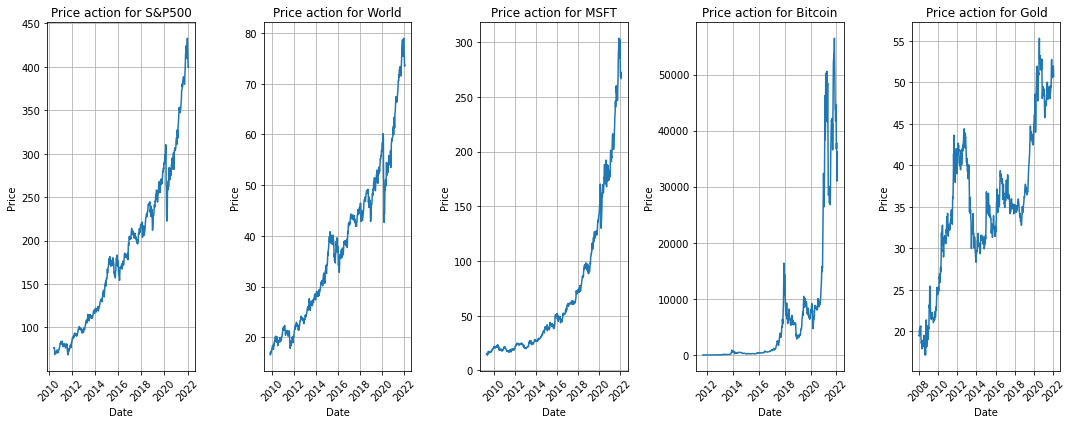

In [9]:
fig, ax = plt.subplots(1,5,figsize=(15,6))

for i, asset in zip(range(0,5), list_assets):
  ax[i].plot(df_main['Date'][asset], df_main['Price'][asset])
  ax[i].set(xlabel='Date', ylabel='Price', title='Price action for ' + str(asset))
  ax[i].tick_params('x', labelrotation=45)
  ax[i].grid()

plt.tight_layout()
plt.show()



---

## **Transform Data**

Next step is to transform the weekly prices in order to know what would be the return if the asset were to be hold for x weeks. This would simulate a lot of different timed investments with different holding duration and would make possible to know where would you get negative returns in the past 10 years if you were to invest in any of these assets and, better yet, how long you were negative in the worst cases.

We want to get an end result like this one:

| Asset | Date | Duration (in weeks) | ROI |
| :- | :- | -: | :-: |
| Asset1 | Date1 | 1 | 1
| Asset1 | Date1 | 2 | 0.8
| Asset1 | Date2 | 1 | -0.6
| Asset1 | Date2 | 2 | 0.2
| Asset2 | Date1 | 1 | 0.5

The way to interpret this table is: 
>An 100€ buy of the **Asset1** on the **Date1** would get you a return of **1%** (101€) in the first week and **0.8%** (100.8€) in the second week.

>On the other hand, the same 100€ buy of the **Asset1** on the **Date2**, would get you **-0.6%** (99.4€) in the first week and **0.2%** (100.2€) in the second.


In order to get a table like this one, we have to loop the main table through the different assets, through each date and calculate the duration and the change percent wise of the return of investment.

Although we have the `Change %` column which tell us how much the price has changed percent wise during that week, we can't use it for periods of more than 1 week. Why is that?

This is something that can easily be confused, but if we think of an example, it will be clear.

Looking at the first 10 weeks of the S&P500, we could say that we just have to add the values in `Change %` for this period of 9 weeks (We don't include the first week, since that is when we bought). But this is not true. The true return of investment is given by: 

$$
ROI = (\frac{FinalPrice}{InitialPrice}-1)*100
$$

For this example, in a period of 9 weeks, the diference is of around 0.2, which for some cases can be the diference between a positive and a negative return.


In [10]:
df_main.loc['S&P500'].head(10)

,Date,Price,Open,High,Low,Vol.,Change %,Asset
0,2010-05-30,76.47,75.76,77.44,75.49,260,1.49,S&P500
1,2010-06-06,76.24,75.11,75.11,74.81,130,-0.30,S&P500
2,2010-06-13,76.88,76.39,76.66,76.34,330,0.84,S&P500
3,2010-06-20,73.77,74.92,74.92,74.05,50,-4.05,S&P500
4,2010-06-27,68.95,73.08,73.08,69.81,20,-6.53,S&P500
5,2010-07-04,72.05,68.86,72.27,68.86,5760,4.50,S&P500
6,2010-07-11,70.61,73.71,73.71,71.80,2850,-2.00,S&P500
7,2010-07-18,72.31,69.53,72.13,69.53,80,2.41,S&P500
8,2010-07-25,71.59,71.59,71.59,71.59,0,-1.00,S&P500
9,2010-08-01,71.02,72.63,73.23,72.00,930,-0.80,S&P500


In [11]:
#Sum all the values in Change % and subtract the first one
sumchange10 = df_main.loc['S&P500']['Change %'].head(10).sum()-df_main.loc['S&P500',0]['Change %']
#Applying the ROI formula
realchange10 = (df_main.loc['S&P500',9]['Price']/df_main.loc['S&P500',0]['Price']-1)*100

print('The sum of the Change % during the first 10 weeks equals to ' + str(sumchange10))
print('The real return of investment is ' + str(realchange10))

The sum of the Change % during the first 10 weeks equals to -6.930000000000001
The real return of investment is -7.126977899830001


Now let's create the new table that'll hold all the new transformed data. We'll loop through the assets and dates and calculate the ROI.

To make it a bit more efficient we can think on the formula to calculate ROI as seen before, take all the prices after the desired date and divide all those prices by the initial price to get the corresponding return of investments for each week. We just have to atribute the correct duration afterwards.

In [12]:
# Create new table
df_roi = pd.DataFrame(columns = ['Asset', 'Date', 'Duration','ROI'])

#Looping through assets
for asset in list_assets:
  # Looping through the dates and calculate duration and ROI for each
  for index, row in df_main.loc[asset].iterrows():
    #Divide prices by the initial price
    df = (df_main.loc[asset].iloc[index+1:, 1]/df_main.loc[asset].iloc[index, 1]-1)*100

    df2 = pd.DataFrame(
      {'Asset': ([row[7]] * len(df)),
      'Date':[row[0]] * len(df),
      'Duration': df.index.tolist(),
      'ROI': df
      })
    df2['Duration']=df2['Duration']-index
    df2['Asset']=df2['Asset'].astype('string')
    if len(df_roi)==0:
      df_roi=df2
    else:
      df_roi = df_roi.append(df2)

df_roi['Positive Return'] = df_roi['ROI']>0

df_roi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032937 entries, 1 to 734
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Asset            1032937 non-null  string        
 1   Date             1032937 non-null  datetime64[ns]
 2   Duration         1032937 non-null  float64       
 3   ROI              1032937 non-null  float64       
 4   Positive Return  1032937 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), string(1)
memory usage: 40.4 MB


In the end, we get a table with 1 million rows, calculated in nearly over 1 min. We can look inside the table to see what it looks like and check if the ROI of 30/05/2010 with 9 week duration matches the one calculated before, which it does.

In [13]:
df_roi[(df_roi['Asset']=='S&P500')].head(9)

,Asset,Date,Duration,ROI,Positive Return
1,S&P500,2010-05-30,1.0,-0.300772,False
2,S&P500,2010-05-30,2.0,0.536158,True
3,S&P500,2010-05-30,3.0,-3.530796,False
4,S&P500,2010-05-30,4.0,-9.833922,False
5,S&P500,2010-05-30,5.0,-5.780044,False
6,S&P500,2010-05-30,6.0,-7.663136,False
7,S&P500,2010-05-30,7.0,-5.440042,False
8,S&P500,2010-05-30,8.0,-6.381588,False
9,S&P500,2010-05-30,9.0,-7.126978,False


We'll create as well a table for the risk of holding an asset for a given ammount of weeks. For this table, we group for each asset the duration and get the average of negative returns for each week.

In [14]:
risk_ratio = ((1-df_roi.groupby(by=['Asset', 'Duration'])['Positive Return'].mean())*100).to_frame()
risk_ratio.reset_index(inplace=True)
risk_ratio.rename(columns={'Positive Return':'Risk'}, inplace=True)

risk_ratio[risk_ratio['Asset']=='S&P500'].head()

,Asset,Duration,Risk
1946,S&P500,1.0,39.244663
1947,S&P500,2.0,35.690789
1948,S&P500,3.0,37.067545
1949,S&P500,4.0,35.643564
1950,S&P500,5.0,31.570248


So for the S&P500, holding the asset for 1 week, has a 39.2% risk of the return being negative. We'll plot it afterwards and check how it changes with the duration.



---


## **Analyse Data**

Now that we have all the desired information, we can start ploting and analyse the data to extract some conclusions. We'll start by looking at the ROI over the duration.

### **Return of Investment in different timeframes**



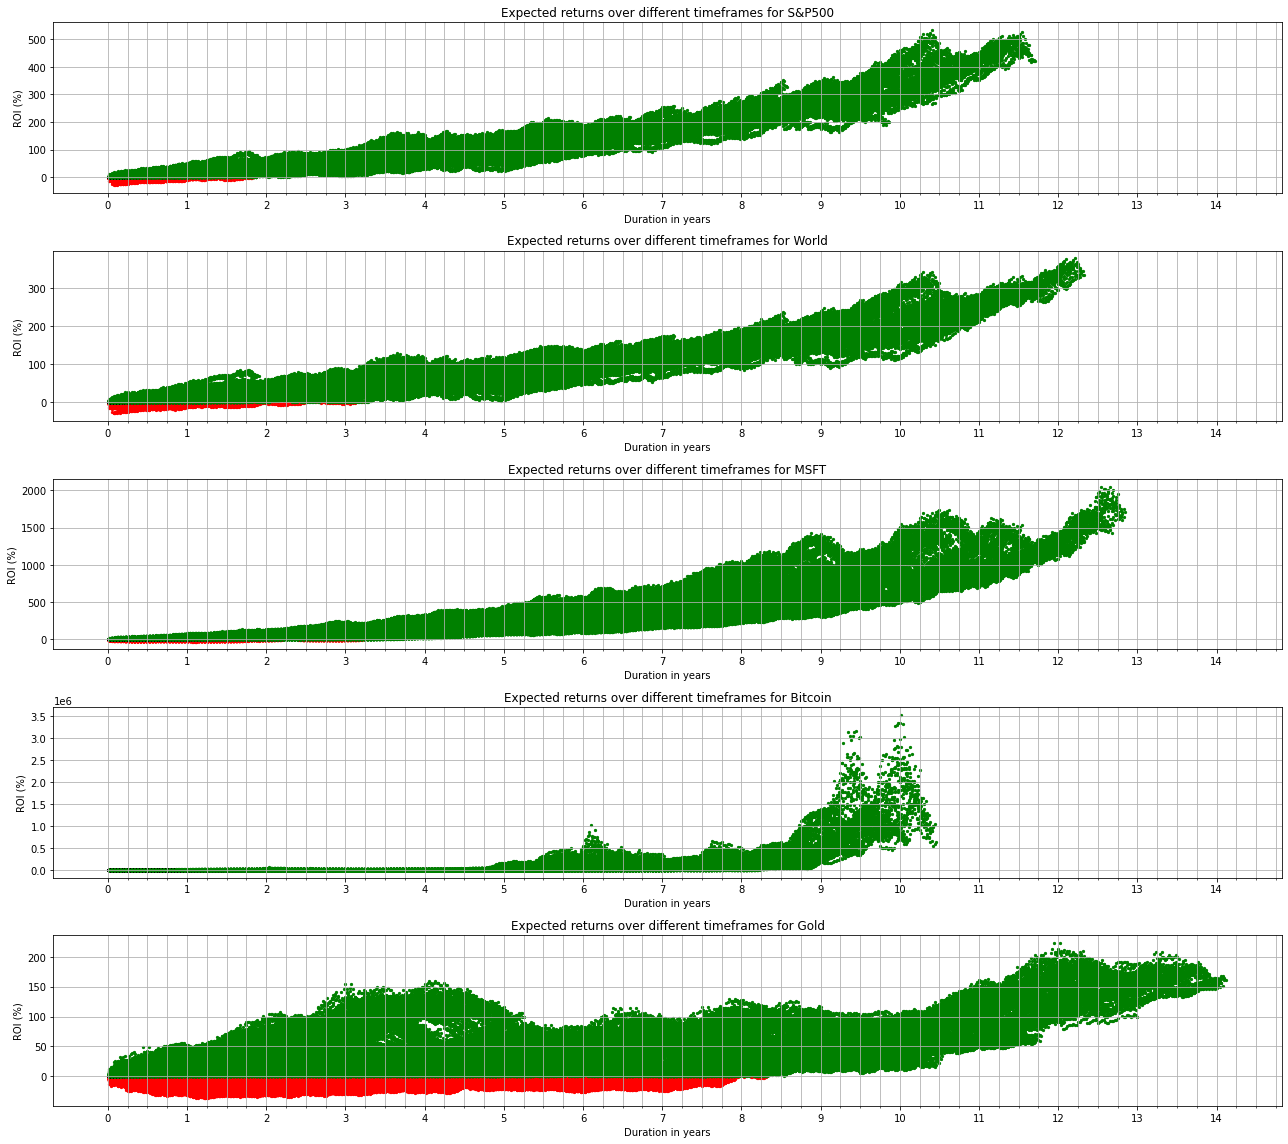

In [15]:
fig, ax = plt.subplots(5, 1, figsize=(18,16), tight_layout=True, sharex=True)

major_ticks = np.arange(0, 15, 1)
minor_ticks = np.arange(0, 15, 0.25)

for asset, i in zip(list_assets, range(0,5)):
  ax[i].scatter(df_roi['Duration'][(df_roi['ROI'] <= 0) & (df_roi['Asset']==asset)]/52, df_roi['ROI'][(df_roi['ROI'] <= 0) & (df_roi['Asset']==asset)], c="red", s=5)
  # plot points outside distribution's width
  ax[i].scatter(df_roi['Duration'][(df_roi['ROI'] > 0) & (df_roi['Asset']==asset)]/52, df_roi['ROI'][(df_roi['ROI'] > 0) & (df_roi['Asset']==asset)], c='green', s=5)

  ax[i].set(xlabel='Duration in years', ylabel='ROI (%)', title = 'Expected returns over different timeframes for ' + str(asset))

  ax[i].set_xticks(major_ticks)
  ax[i].set_xticks(minor_ticks, minor=True)
  ax[i].grid(which='both')
  ax[i].xaxis.set_tick_params(labelbottom=True)

plt.show()

On the 5 charts above we can see all the possible trades over different timeframes. Anything above 0 is positive return and everything below or equals to zero is negative. Considering zero as negative since the goal of investing is to get some kind of profit. On the next 5 charts, let's zoom in on the negative ones and trace the risk lines.

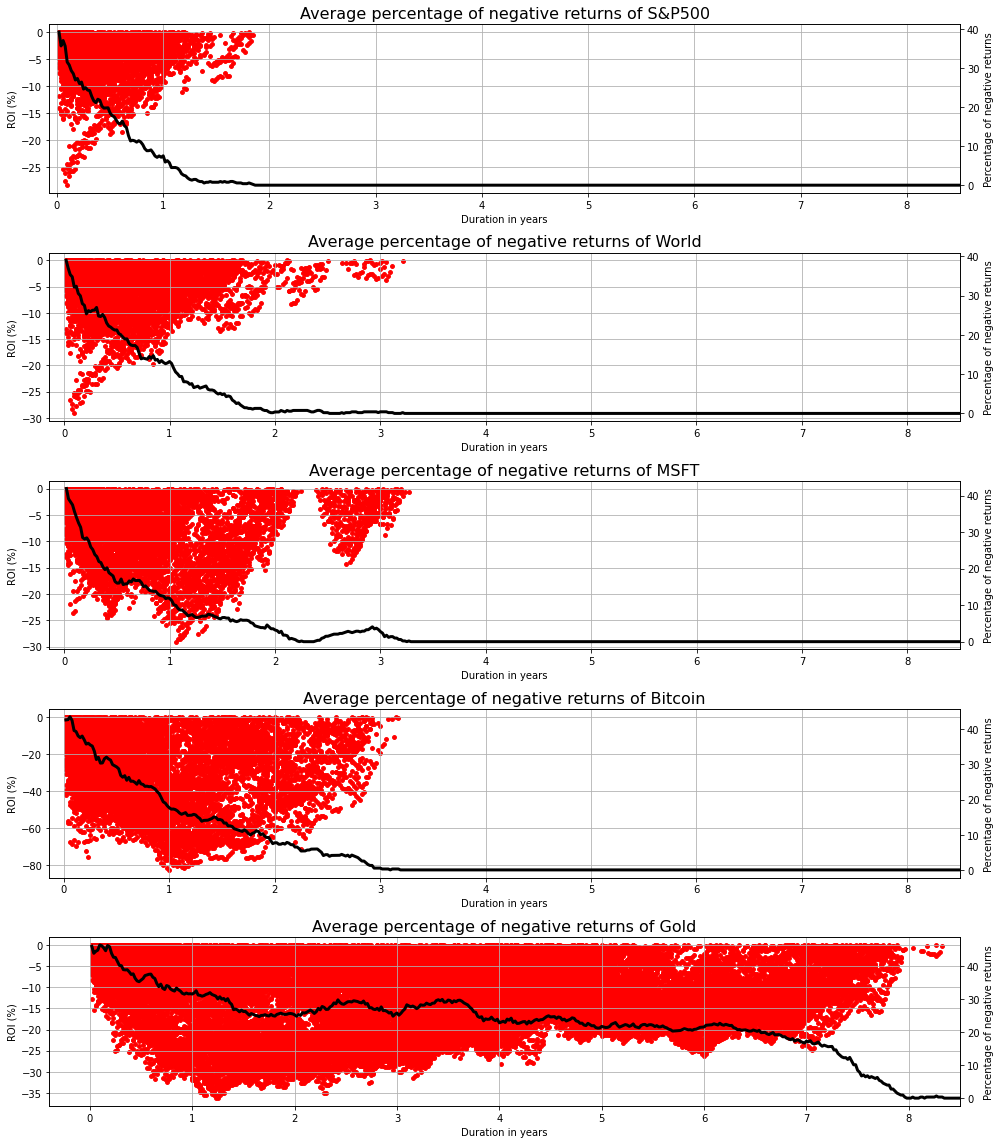

In [16]:
fig, ax = plt.subplots(5, 1, figsize=(14,16), tight_layout=True)

for asset, i in zip(list_assets, range(0,5)):
  ax[i].scatter(df_roi['Duration'][(df_roi['ROI'] <= 0) & (df_roi['Asset']==asset)]/52, df_roi['ROI'][(df_roi['ROI'] <= 0) & (df_roi['Asset']==asset)], c="red", s=15)
  ax[i].set(xlabel = 'Duration in years', ylabel='ROI (%)')
  ax[i].set_title('Average percentage of negative returns of ' + str(asset), fontsize = 16)

  ax2=ax[i].twinx()
  ax2.plot(risk_ratio['Duration'][(risk_ratio['Asset']==asset)]/52, risk_ratio['Risk'][(risk_ratio['Asset']==asset)], lw=3, color='black', scalex=False)
  ax[i].set_xlim(right= 8.5)
  ax2.set(ylabel='Percentage of negative returns')
  ax[i].grid()

plt.show()

We can conclude therefore that between the 5 assets, historically and in the worst case: 
1.   The S&P500 was the asset with the fastest time to breakeven with 1.8 years or nearly 94 weeks, 
2.   Followed by Bitcoin, MSCI World and Microsoft stock with around 3.2-3.3 years or 166-172 weeks. 
3.   The worst short-term performer was Gold with a 8.3 years to breakeven or 432 weeks.

**In some of the worst cases, it seems that it could take years until you would not see any negative values.**

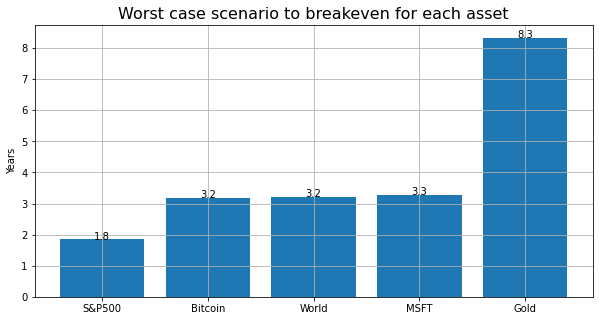

In [17]:
top_duration = df_roi[(df_roi['ROI'] <= 0)].groupby(by=['Asset']).max().sort_values(by='Duration')

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(x=top_duration.index.tolist(), height=top_duration['Duration']/52)
for i in range(len(top_duration.index.tolist())):
  plt.text(i, top_duration['Duration'][i]/52, round(top_duration['Duration'][i]/52,1), ha = 'center')

plt.title('Worst case scenario to breakeven for each asset', fontsize = 16)
ax.set_ylabel('Years')
plt.grid()
plt.show()

But what if you think the risk is worth it and you feel like you can handle it? We can use the risk line to assess how much risky holding an asset for a given time is or what is the probability of having negative returns. 

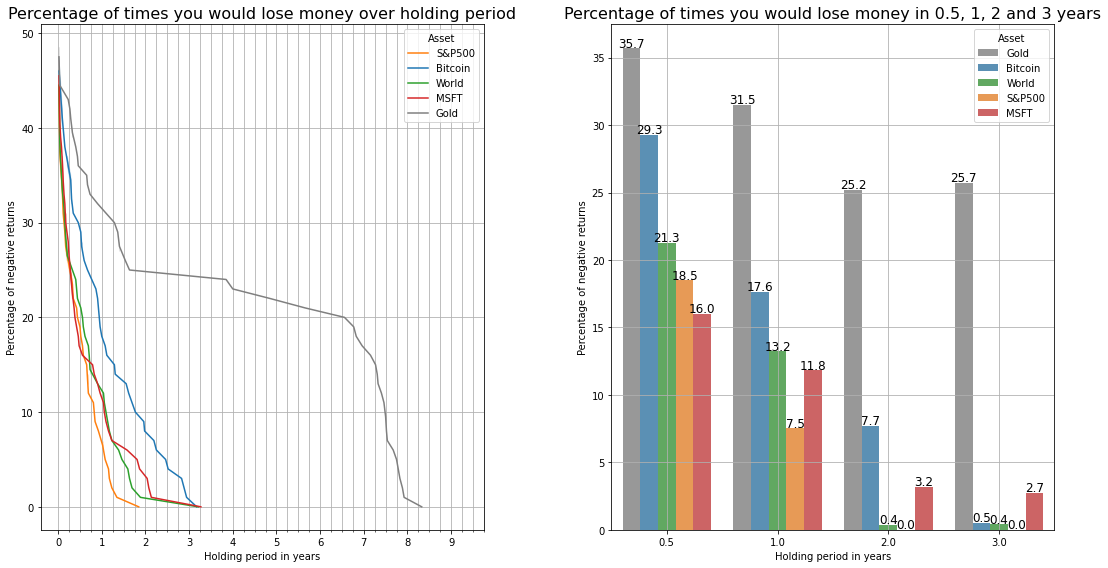

In [18]:
df_risk = top_duration['Duration'].copy().to_frame()
df_risk['Rounded']=([0] * len(df_risk))

for risk in range(1, 50, 1):
  df=risk_ratio[risk_ratio['Risk']<=risk].groupby(by=['Asset']).min()
  df['Rounded']=risk
  df_risk = df_risk.append(df)

df_risk['Duration']=df_risk['Duration']/52  
df_risk.reset_index(inplace=True)

palette = {'Bitcoin': 'C0', 'S&P500': 'C1', 'World': 'C2', 'MSFT': 'C3', 'Gold': 'C7'}

fig, ax = plt.subplots(1, 2, figsize=(16,8), tight_layout=True)
sns.lineplot(data=df_risk, x = 'Duration', y = 'Rounded', hue = "Asset", ax=ax[0], palette=palette)

ax[0].set(xlabel='Holding period in years', ylabel='Percentage of negative returns')
ax[0].set_title('Percentage of times you would lose money over holding period', fontsize=16)

major_ticks = np.arange(0, 10, 1)
minor_ticks = np.arange(0, 10, 0.25)

ax[0].set_xticks(major_ticks)
ax[0].set_xticks(minor_ticks, minor=True)
ax[0].grid(which='both')


list_dur=[26, 52, 2*52, 3*52]
risk_ratio_plot = risk_ratio[risk_ratio['Duration'].isin(list_dur)].copy()
risk_ratio_plot['Duration']=risk_ratio_plot['Duration']/52

sns.barplot(data=risk_ratio_plot.sort_values(by='Risk', ascending=False), 
            x='Duration', 
            y='Risk', 
            hue='Asset', 
            palette=palette, alpha=0.8, ax=ax[1])

ax[1].grid()
ax[1].set(xlabel='Holding period in years', ylabel='Percentage of negative returns')
ax[1].set_title('Percentage of times you would lose money in 0.5, 1, 2 and 3 years', fontsize=16)
#Annotated labels for grouped bar plot
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.show()

Some conclusions from this chart:


1.   S&P500, MSCI World and Microsoft all have a steep decline on the risk over the first year, from around 45% to 15%.
2.   Bitcoin has a slight higher risk which makes sense being a more volatile asset.
3.   Gold comes as the curve ball, since the risk took 7.5 years to get to 10%. This might be a result from the high devaluation of gold in 2012.
4.   Although Microsoft has lower risk short-term, within 3 years has higher risk (2.7%) than S&P500, MSCI World and Bitcoin.
5.   The traditional market assets S&P500, MSCI World and MSFT might have a worst case breakeven point of 2 to 3 years, but within the second year the risk is only up to 3.2%.

Next we can see a distribution of those negative returns over the different timeframes. Gold has a more linear distribution, while the other assets have the highest frequency of negative returns on the short-term. This might be due to the return being susceptible to immediate/short-term volatility, growing better with time.

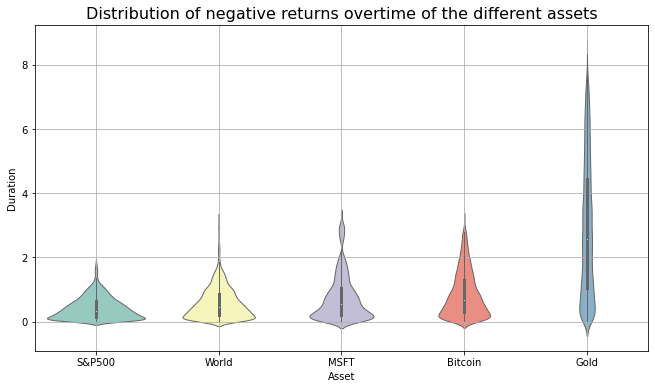

In [19]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(x=df_roi['Asset'][df_roi['ROI'] <= 0], y=df_roi['Duration'][df_roi['ROI'] <= 0]/52, palette="Set3", linewidth=1)
ax.set_title('Distribution of negative returns overtime of the different assets', fontsize=16)
plt.grid()

### **Annualized Return**

One thing that is obvious by now, is that the longer you hold an asset, the higher the return is. But we can turn the return a little bit more "flat" and make it so that the the length of time the investment is held doesn't matter that much. We do this with the Annualized Return given by:

$$
Annualized ROI = [(1+ROI)^\frac{1}{n}-1]*100
$$
where n corresponds to number of years the investment is held.

And why not just dividing the return of investment by the number of years? Because of compounding (every year, you are earning more by accumulating and profiting over that), which over time can make a significant difference. We'll calculate the Annual Return of Investment for all the values in the table and then compare both the normal return and the annualized of the longer investment of the S&P500 to see this effect.

In [20]:
# get annualized return by dividing ROI with the duration
df_roi['Annual ROI'] = (np.power(1+df_roi['ROI']/100,1/(df_roi['Duration']/52))-1)*100

df_roi.head()

,Asset,Date,Duration,ROI,Positive Return,Annual ROI
1,S&P500,2010-05-30,1.0,-0.300772,False,-14.498553
2,S&P500,2010-05-30,2.0,0.536158,True,14.915708
3,S&P500,2010-05-30,3.0,-3.530796,False,-46.370467
4,S&P500,2010-05-30,4.0,-9.833922,False,-73.964774
5,S&P500,2010-05-30,5.0,-5.780044,False,-46.162348


In [21]:
df_roi[df_roi['Asset']=='S&P500'].sort_values(by='Duration', ascending=False).head(1)

,Asset,Date,Duration,ROI,Positive Return,Annual ROI
609,S&P500,2010-05-30,609.0,423.002485,True,15.172839


In [22]:
#Using S&P500 on the 30/05/2010, holding for 609 weeks
#ROI = 423
#Annualized Return = 15.17
period = 609/52

print('Dividing the ROI of 423% by the number of years (' + str(round(period,2)) +') would give ' + str(round(423/period,2)) + '%')
print('The correct annualized return is 15.17%')
print('Initial price was: 76.47')
print('Final price was 399.94')
print('Calculating final price using the averaged annualized return:')
print(76.47*(1+36.12/100)**(period))
print('Calculating final price using the correct annualized return:')
print(76.47*(1+15.17/100)**(period))

Dividing the ROI of 423% by the number of years (11.71) would give 36.12%
The correct annualized return is 15.17%
Initial price was: 76.47
Final price was 399.94
Calculating final price using the averaged annualized return:
2830.8903390200403
Calculating final price using the correct annualized return:
399.8245380193002


On the bit of code above, we can see how much off we would be if we just divided the ROI by the number of years, hence it is important we use the formula aforementioned.

Next, we'll plot the Annualized Return over the different duration of investment and focus on the distribution of the negative values.


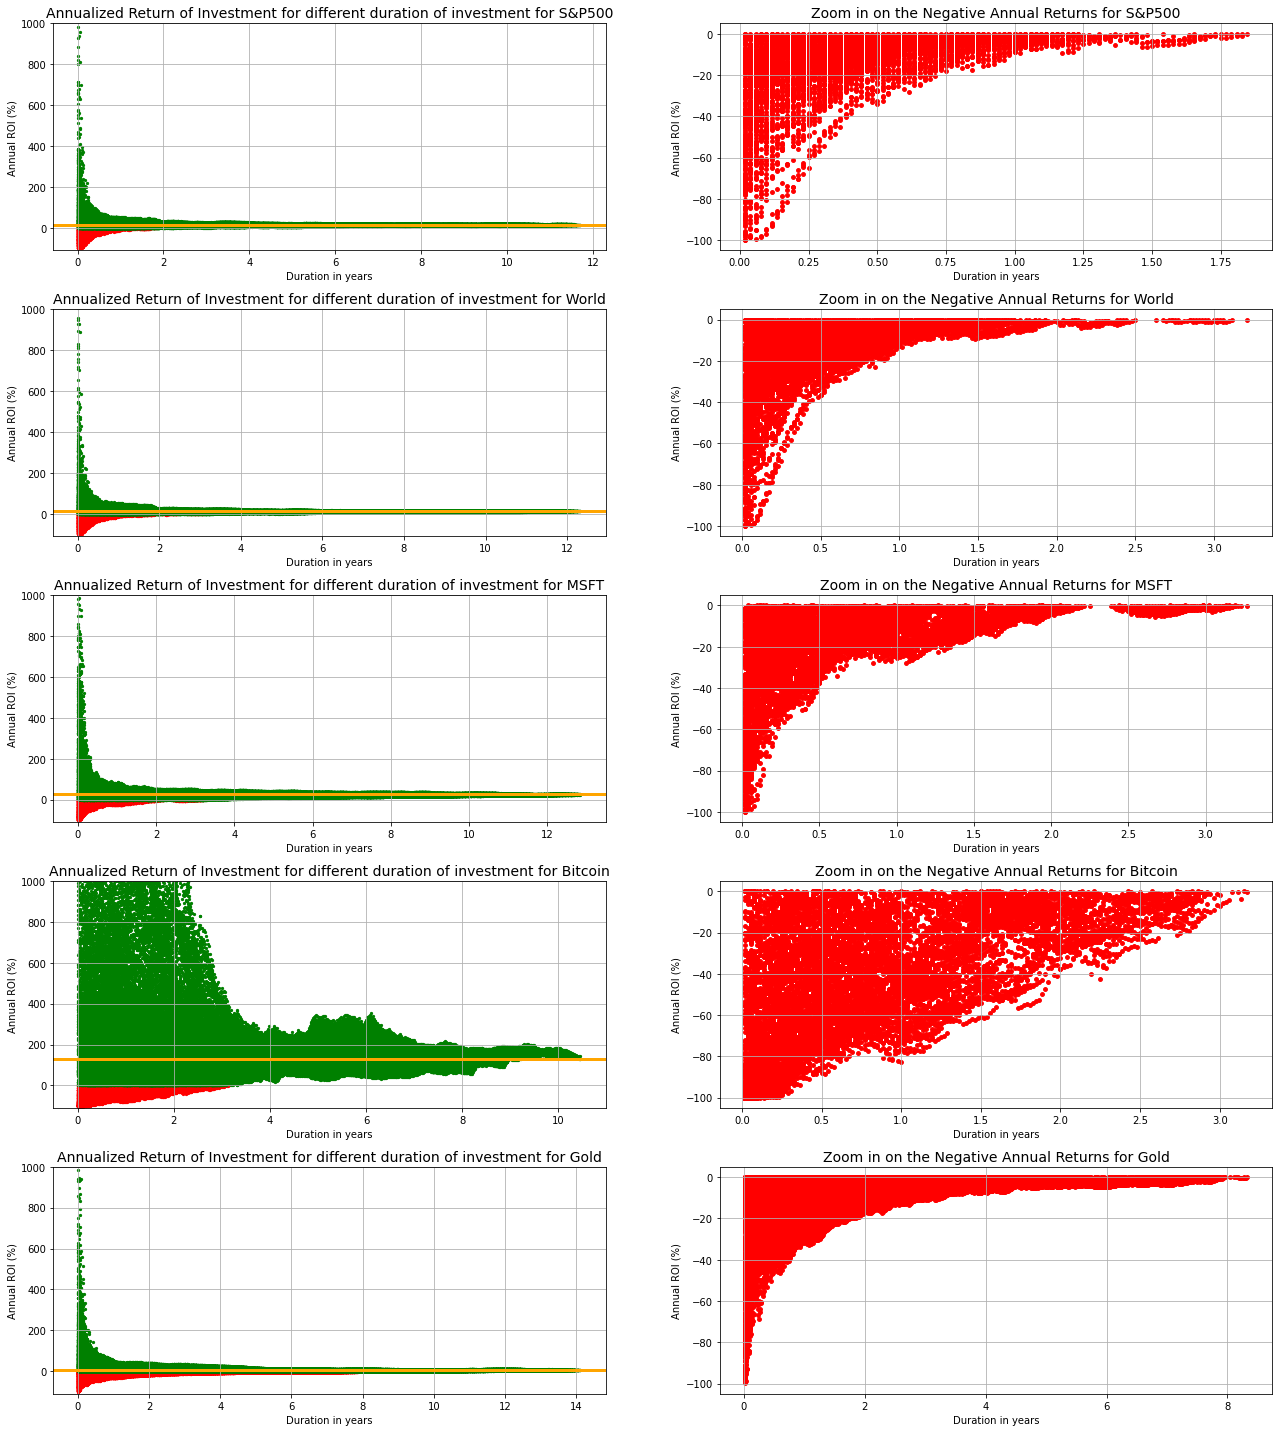

In [23]:
fig, ax = plt.subplots(5, 2, figsize=(18,20), tight_layout=True)

inflation = 0

for asset, i in zip(list_assets, range(0,5)):
  ax[i,0].scatter(df_roi['Duration'][(df_roi['Annual ROI'] <= inflation) & (df_roi['Asset']==asset)]/52, df_roi['Annual ROI'][(df_roi['Annual ROI'] <= inflation) & (df_roi['Asset']==asset)], c="red", s=5)
 
  # plot points outside distribution's width
  ax[i,0].scatter(df_roi['Duration'][(df_roi['Annual ROI'] > inflation) & (df_roi['Asset']==asset)]/52, df_roi['Annual ROI'][(df_roi['Annual ROI'] > inflation) & (df_roi['Asset']==asset)], c="green", s=5)
  ax[i,0].axhline(y=df_roi['Annual ROI'][(df_roi['Asset']==asset)].median(), color='orange', lw=3)

  ax[i,1].scatter(df_roi['Duration'][(df_roi['Annual ROI'] <= inflation) & (df_roi['Asset']==asset)]/52, df_roi['Annual ROI'][(df_roi['Annual ROI'] <= inflation) & (df_roi['Asset']==asset)], c="red", s=15)
  ax[i,0].grid()
  ax[i,1].grid()

  ax[i,0].set(xlabel='Duration in years', ylabel='Annual ROI (%)')
  ax[i,0].set_title('Annualized Return of Investment for different duration of investment for ' + str(asset), fontsize=14)
  ax[i,1].set(xlabel='Duration in years', ylabel='Annual ROI (%)')
  ax[i,1].set_title('Zoom in on the Negative Annual Returns for ' + str(asset), fontsize=14)
  ax[i,0].set_ylim([-110, 1000])

plt.show()

There are some really important conclusions that we can take from these charts.

*   Volatility has higher impact on the shorter timeframes, hence having Annualized Returns of around -100%.
*   Negative returns get a distribution similar to a logarithmic curve, where there is a steep increase on the return followed by a slower growth. The exception is Bitcoin where this seems to be impacted by its volatility.
*   On the long-term, the annualized return of investment is expected to be more and more stable - getting closer to the median.
*   When you shift the mentality of investment to a long-term, the compound starts taking effect, dampening the volatility. Helps even with the higher volatility of Bitcoin, although not as much as the other assets.


Now that we know that long-term, the Annualized Return will get closer to the median, we can plot them to check what kind of returns we can expect over the years for these assets.

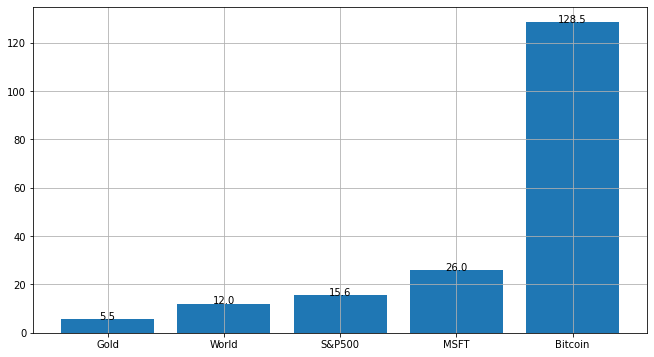

In [24]:
f, ax = plt.subplots(figsize=(11, 6))
median_roi = df_roi.groupby(df_roi['Asset']).median().sort_values(by=['Annual ROI'])
ax.bar(x=median_roi.index.tolist(), height=median_roi['Annual ROI'])

for i in range(len(median_roi.index.tolist())):
  plt.text(i, median_roi['Annual ROI'][i], round(median_roi['Annual ROI'][i],1), ha = 'center')
plt.grid()
plt.show()

So we can easily conclude:


*   Gold was the asset with the lowest annualized return of 5.5%.
*   MSCI World with 12% has a lower return than S&P500 of 15.6%. This is due to the fact that the MSCI World ETF is a broader and more general ETF with less volatility.
*   Same can be said of the Microsoft stock with an annual return of 26%. Being more focused on a company than in several as is the case for the ETFs, the volatily is higher.
*   Bitcoin, the asset with more volatility, is the riskier, but also the most profitable with an 128.5% annual return. You might not expect these returns anymore due to the fact that this asset has become more mature overtime. Given more data, the median of the asset might decrease.

Putting this into perspective, an investment of 1000€ on each asset would result in:

**First year:**

*   Gold: 1000*(1+0.055) = 1055€
*   MSCI World: 1000*(1+0.12) = 1120€
*   S&P500: 1000*(1+0.156) = 1156€
*   MSFT: 1000*(1+0.26) = 1260€
*   Bitcoin: 1000*(1+1.285) = 2285€

**Second year:**

*   Gold: 1055*(1+0.055) = 1113€
*   MSCI World: 1120*(1+0.12) = 1254.4€
*   S&P500: 1156*(1+0.156) = 1336.34€
*   MSFT: 1260*(1+0.26) = 1587.6€
*   Bitcoin: 2285*(1+1.285) = 5221.22€


Again, the compounding effect here is clear by applying the same annualized return over an investment that grows every year, resulting in higher returns.

### **Inflation**

When investing, your main goal is not only to breakeven. If that was the case, then why bother doing it? At least we want to break inflation so we don't lose buying power due to it. Another advantage of having the annualized return on our data is that now we can compare it against inflation and check how each assets performs.

We'll plot the same charts as before, but now instead of considering negative results everything below or equal to zero, we compare it to different values of inflation - 1, 3, 5 and 7%.

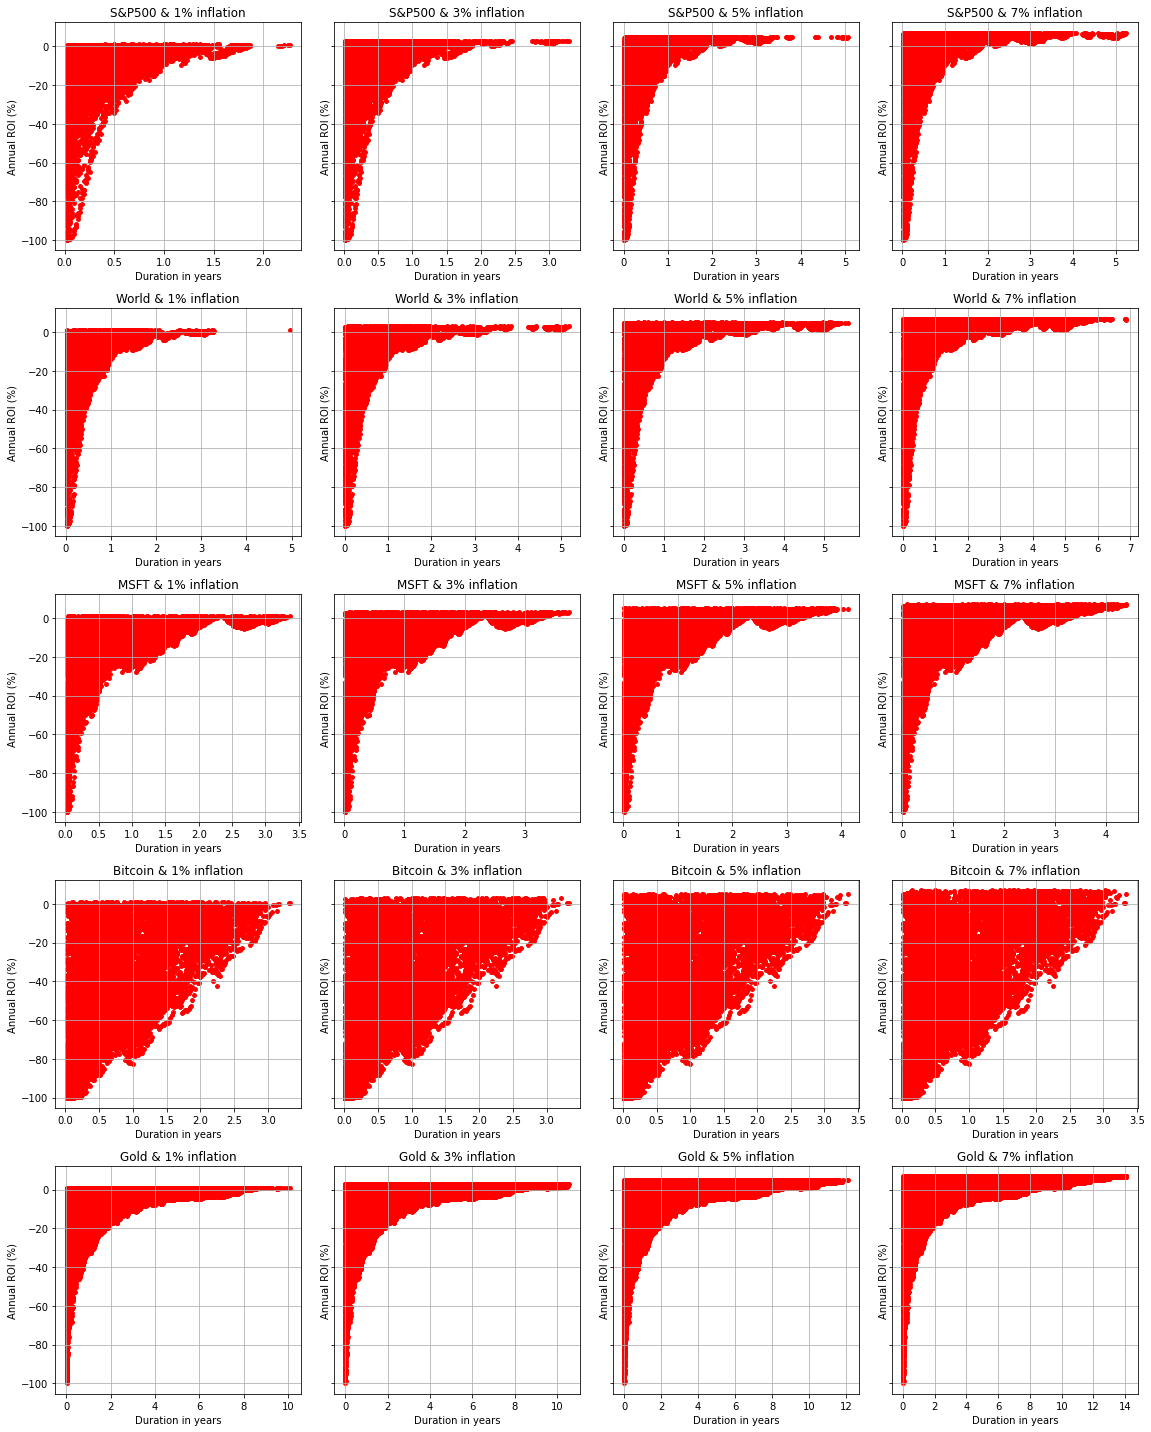

In [25]:
fig, ax = plt.subplots(5, 4, figsize=(16,20), sharey=True, tight_layout=True)

for asset, i in zip(list_assets, range(0,5)):
  for inflation, j in zip([1, 3, 5, 7], range(0,4)):
    ax[i,j].scatter(df_roi['Duration'][(df_roi['Annual ROI'] <= inflation) & (df_roi['Asset']==asset)]/52, df_roi['Annual ROI'][(df_roi['Annual ROI'] <= inflation) & (df_roi['Asset']==asset)], c="red", s=15)
    ax[i,j].set(xlabel='Duration in years', ylabel='Annual ROI (%)', title=str(asset) + ' & ' + str(inflation) + '% inflation')
    ax[i,j].grid()

plt.show()

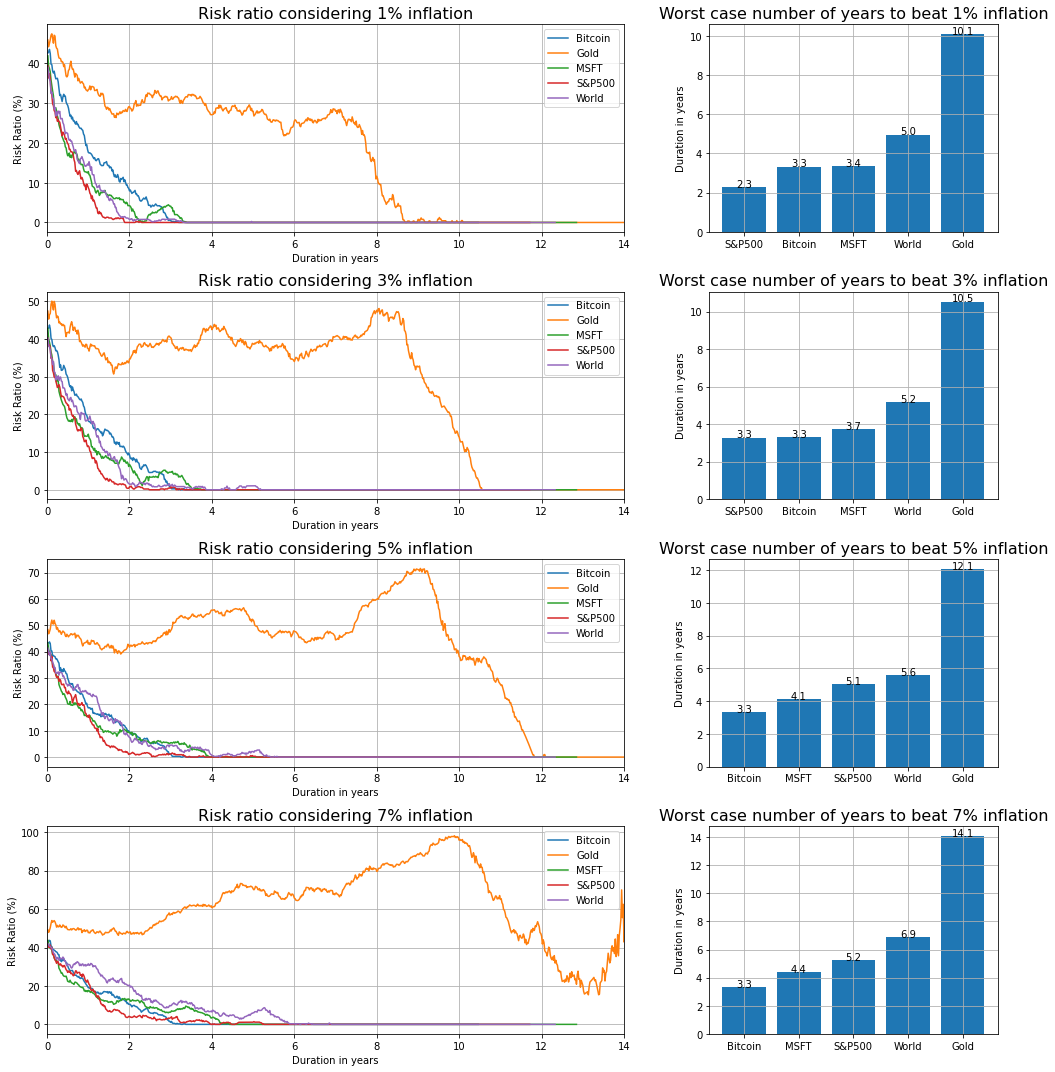

In [26]:
fig, ax = plt.subplots(4, 2, figsize=(15,15), tight_layout=True, gridspec_kw={'width_ratios': [2, 1]})

inf_mean = df_roi[['Asset', 'Duration', 'Annual ROI']].copy()
inf_mean['Duration'] = inf_mean['Duration']/52

# Set inflation to 0%
inflation = 0

top_duration = df_roi[(df_roi['Annual ROI'] <= inflation)].groupby(by=['Asset']).max().sort_values(by='Duration')
top_duration['Inflation'] = inflation
df_topdur_inf = top_duration[['Duration', 'Inflation']].copy()
inflation = 1
#Loop through the different inflation values (1,2,3 and 5) and plot
for i in range(0,4):

  inf_mean['Boolean Inf ' + str(inflation)] = inf_mean['Annual ROI'] - inflation > 0
  sns.lineplot(data=(1-inf_mean.groupby(by=['Asset', 'Duration']).mean())*100, x = 'Duration', y = 'Boolean Inf ' + str(inflation), hue = "Asset", ax=ax[i,0])
  ax[i,0].set(xlabel='Duration in years', ylabel='Risk Ratio (%)')
  ax[i,0].set_title('Risk ratio considering '+ str(inflation) + '% inflation', fontsize=16)
  ax[i,0].set_xlim([0, 14])
  ax[i,0].grid()
  ax[i,0].legend(loc="upper right")

  top_duration = df_roi[(df_roi['Annual ROI'] <= inflation)].groupby(by=['Asset']).max().sort_values(by='Duration')
  top_duration['Inflation']=inflation
  df_topdur_inf = df_topdur_inf.append(top_duration[['Duration', 'Inflation']])

  ax[i,1].bar(x=top_duration.index.tolist(), height=top_duration['Duration']/52)
  ax[i,1].set(ylabel='Duration in years')
  ax[i,1].set_title('Worst case number of years to beat '+ str(inflation) + '% inflation', fontsize=16)
  ax[i,1].grid()
  inflation += 2
  for j in range(len(top_duration.index.tolist())):
    ax[i,1].text(j, top_duration['Duration'][j]/52, round(top_duration['Duration'][j]/52,1), ha = 'center')

plt.show()

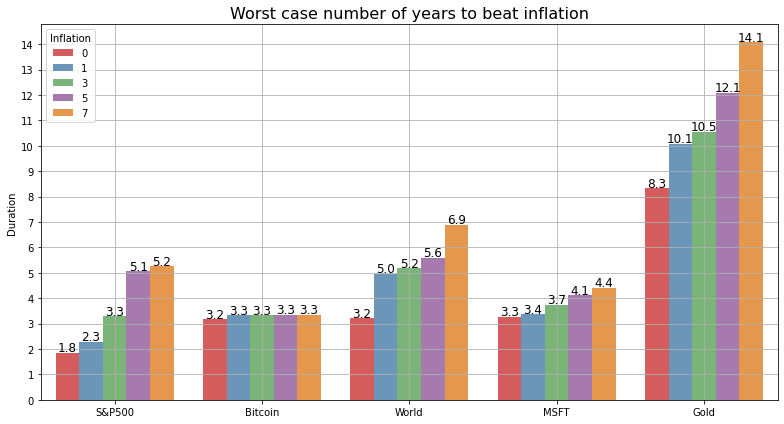

In [27]:
f, ax = plt.subplots(figsize=(11, 6), tight_layout=True)

sns.barplot(data=df_topdur_inf,
            x=df_topdur_inf.index.tolist(), y=df_topdur_inf['Duration']/52, hue="Inflation", 
            palette='Set1', alpha=0.8, ax=ax)

major_ticks = np.arange(0, 15, 1)
ax.set_yticks(major_ticks)
plt.grid()
ax.set_title('Worst case number of years to beat inflation', fontsize=16)

#Annotated labels for grouped bar plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

plt.show()

It comes to no surprise that the higher the inflation to be beat, the longer is duration for the investment to be held in order to secure an annualized return higher than the inflation itself.

The scenario depicted here is for the worst case possible and it tell us that in order to consistently beat an inflation of 7% every year, you would have to hold Bitcoin for a little more than 3 years, Microsoft for 4 years, S&P500 for more than 5 years, MSCI World for almost 7 and Gold, with today's data, beats it with around 40% risk.

You can see that:
*   Bitcoin is the asset that best handled the inflation with little difference to the breakeven duration. Also Microsoft only had an increase of 1 year for the worst level of inflation, surpassing the performance of S&P500 with an inflation of 5%.

*   S&P500 and MSCI World had a jump of 3-4 years from the breakeven duration.

Some things to notice about Gold:

*   Gold continues to be the worst asset with the highest duration in any of the categories, from 8 to 14 years, not being able to beat an inflation of 7% with zero risk (>40%).

*   The risk for all assets except Gold decreases relatively quickly and gets under the 10% in less than 3 years, while Gold has a more unpredictable risk.

This makes sense if we remember what we learned about the annualized returns of each asset where it tends to approximate the median. An inflation of 7% is higher than the median of Gold (5.5%), so you are taking risk trying to beat it with Gold.

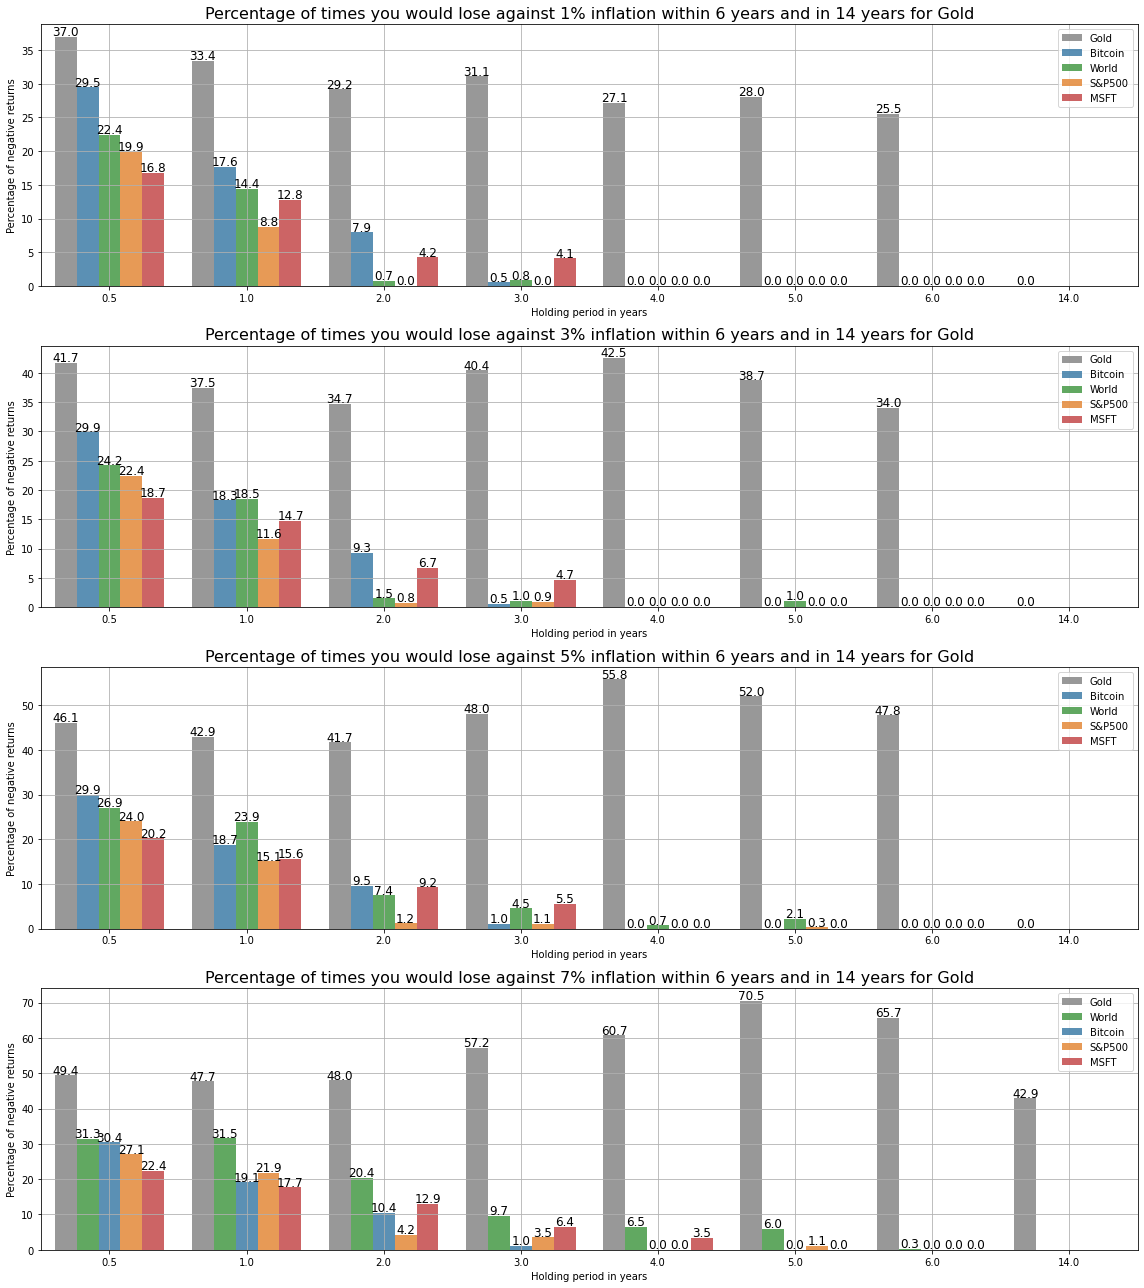

In [28]:
fig, ax = plt.subplots(4, 1, figsize=(16,18), tight_layout=True)
inflation=1

list_dur=[26, 52, 2*52, 3*52, 4*52, 5*52, 6*52, 14*52]

for i in range(0,4):
  risk_ratio_inf = ((1-inf_mean.groupby(by=['Asset', 'Duration'])['Boolean Inf ' + str(inflation)].mean())*100).to_frame()
  risk_ratio_inf.reset_index(inplace=True)
  risk_ratio_inf.rename(columns={'Boolean Inf ' + str(inflation):'Risk'}, inplace=True)
  risk_ratio_plot = risk_ratio_inf[risk_ratio['Duration'].isin(list_dur)].copy()

  sns.barplot(data=risk_ratio_plot.sort_values(by='Risk', ascending=False), 
              x='Duration', 
              y='Risk', 
              hue='Asset', 
              palette=palette, alpha=0.8, ax=ax[i])

  ax[i].grid()
  ax[i].set(xlabel='Holding period in years', ylabel='Percentage of negative returns')
  ax[i].set_title('Percentage of times you would lose against ' + str(inflation) + '% inflation within 6 years and in 14 years for Gold', fontsize=16)
  ax[i].legend(loc='upper right')
  #Annotated labels for grouped bar plot
  for p in ax[i].patches:
      ax[i].annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    size=12,
                    xytext = (0, 5), 
                    textcoords = 'offset points')
  inflation += 2

plt.show()

The charts above show the percentage of times you wouldn't beat the different levels of inflation. 

Not including Gold, we could say that:

*   It seems that by the forth year, you have relatively good chances (6.5% risk, so 93.5% sucess) of beating inflation up to 7%. 

*   The same could be said for the fifth year, although some of the assets seem to increase a little bit the risk (for example, S&P500 in 7% inflation, from 0% to 1.1%). This small increase might result from a crash in the market, such as the one in 2020 due to the pandemic.

*   You have very good chances (~0% risk, ~100% sucess) of beating up to 7 inflation from the sixth year onwards.

*   Regarding Gold, we could say that it's the riskier asset to use to beat inflation.

In the next charts, we take a look at the distribution of the annualized returns of holding periods of 3 and 6 years. You'll see the outliers (the dots) lessening with the holding period and that the 25 and 75% percentiles don't change, the whiskers do. As seen before, with time, the annualized return for each asset will approximate to the center line - the median - getting inside the boxes, decreasing the risk of negative return for inflations underneath. For example, the 3, 5 and 7% inflation are inside the box of Gold, hence the riskier is to beat this kind of inflations, as seen.

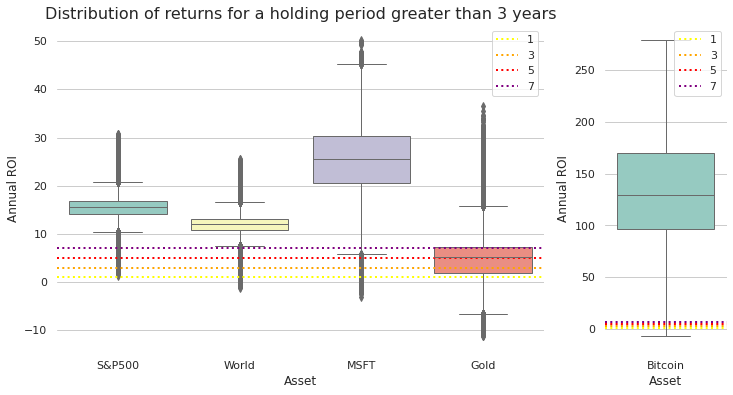

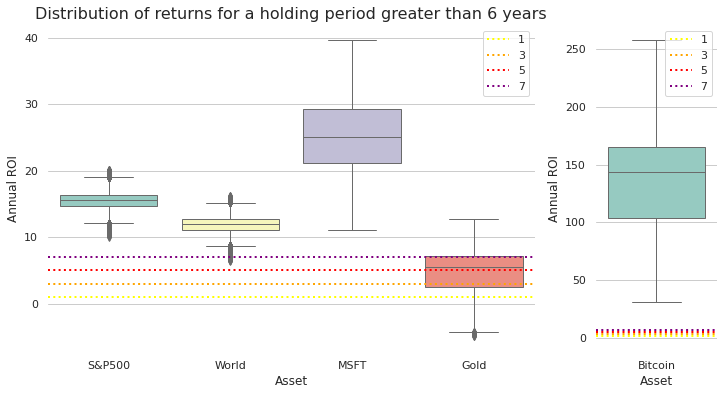

In [29]:
sns.set_theme(style="whitegrid")
# Set up the matplotlib figure
f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [4, 1]})
df_saferoi = df_roi[df_roi['Duration']>=52*3]

# Draw a violinplot with a narrower bandwidth than the default
sns.boxplot(x=df_saferoi['Asset'][df_saferoi['Asset'] != 'Bitcoin'], y=df_saferoi['Annual ROI'][df_saferoi['Asset'] != 'Bitcoin'], palette="Set3", linewidth=1, showfliers=True, ax=ax1)
sns.boxplot(x=df_saferoi['Asset'][df_saferoi['Asset'] == 'Bitcoin'], y=df_saferoi['Annual ROI'][df_saferoi['Asset'] == 'Bitcoin'], palette="Set3", linewidth=1, showfliers=False, ax=ax2)

ax1.set_title('Distribution of returns for a holding period greater than 3 years', fontsize=16)
# Finalize the figure
sns.despine(left=True, bottom=True)
for ax in [ax1, ax2]:
  ax.axhline(1, color='yellow', ls=':', lw=2, label = '1')
  ax.axhline(3, color='orange', ls=':', lw=2, label = '3')
  ax.axhline(5, color='red', ls=':', lw=2, label = '5')
  ax.axhline(7, color='purple', ls=':', lw=2, label = '7')
  ax.legend(loc='upper right')

f2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [4, 1]})
df_saferoi = df_roi[df_roi['Duration']>=52*6]

# Draw a violinplot with a narrower bandwidth than the default
sns.boxplot(x=df_saferoi['Asset'][df_saferoi['Asset'] != 'Bitcoin'], y=df_saferoi['Annual ROI'][df_saferoi['Asset'] != 'Bitcoin'], palette="Set3", linewidth=1, showfliers=True, ax=ax3)
sns.boxplot(x=df_saferoi['Asset'][df_saferoi['Asset'] == 'Bitcoin'], y=df_saferoi['Annual ROI'][df_saferoi['Asset'] == 'Bitcoin'], palette="Set3", linewidth=1, showfliers=False, ax=ax4)

ax3.set_title('Distribution of returns for a holding period greater than 6 years', fontsize=16)

# Finalize the figure
sns.despine(left=True, bottom=True)
for ax in [ax3, ax4]:
  ax.axhline(1, color='yellow', ls=':', lw=2, label = '1')
  ax.axhline(3, color='orange', ls=':', lw=2, label = '3')
  ax.axhline(5, color='red', ls=':', lw=2, label = '5')
  ax.axhline(7, color='purple', ls=':', lw=2, label = '7')
  ax.legend(loc='upper right')

plt.show()

### **Is it possible to find a good opportunity?**

Now that we know how much time it can take to breakeven in some of the worst cases, what can we do to make it better? Let's look first to the dates where it took the longer to breakeven and check for some patterns. In the charts below, you'll see the darker colors meaning longer duration and brighter color lower duration.

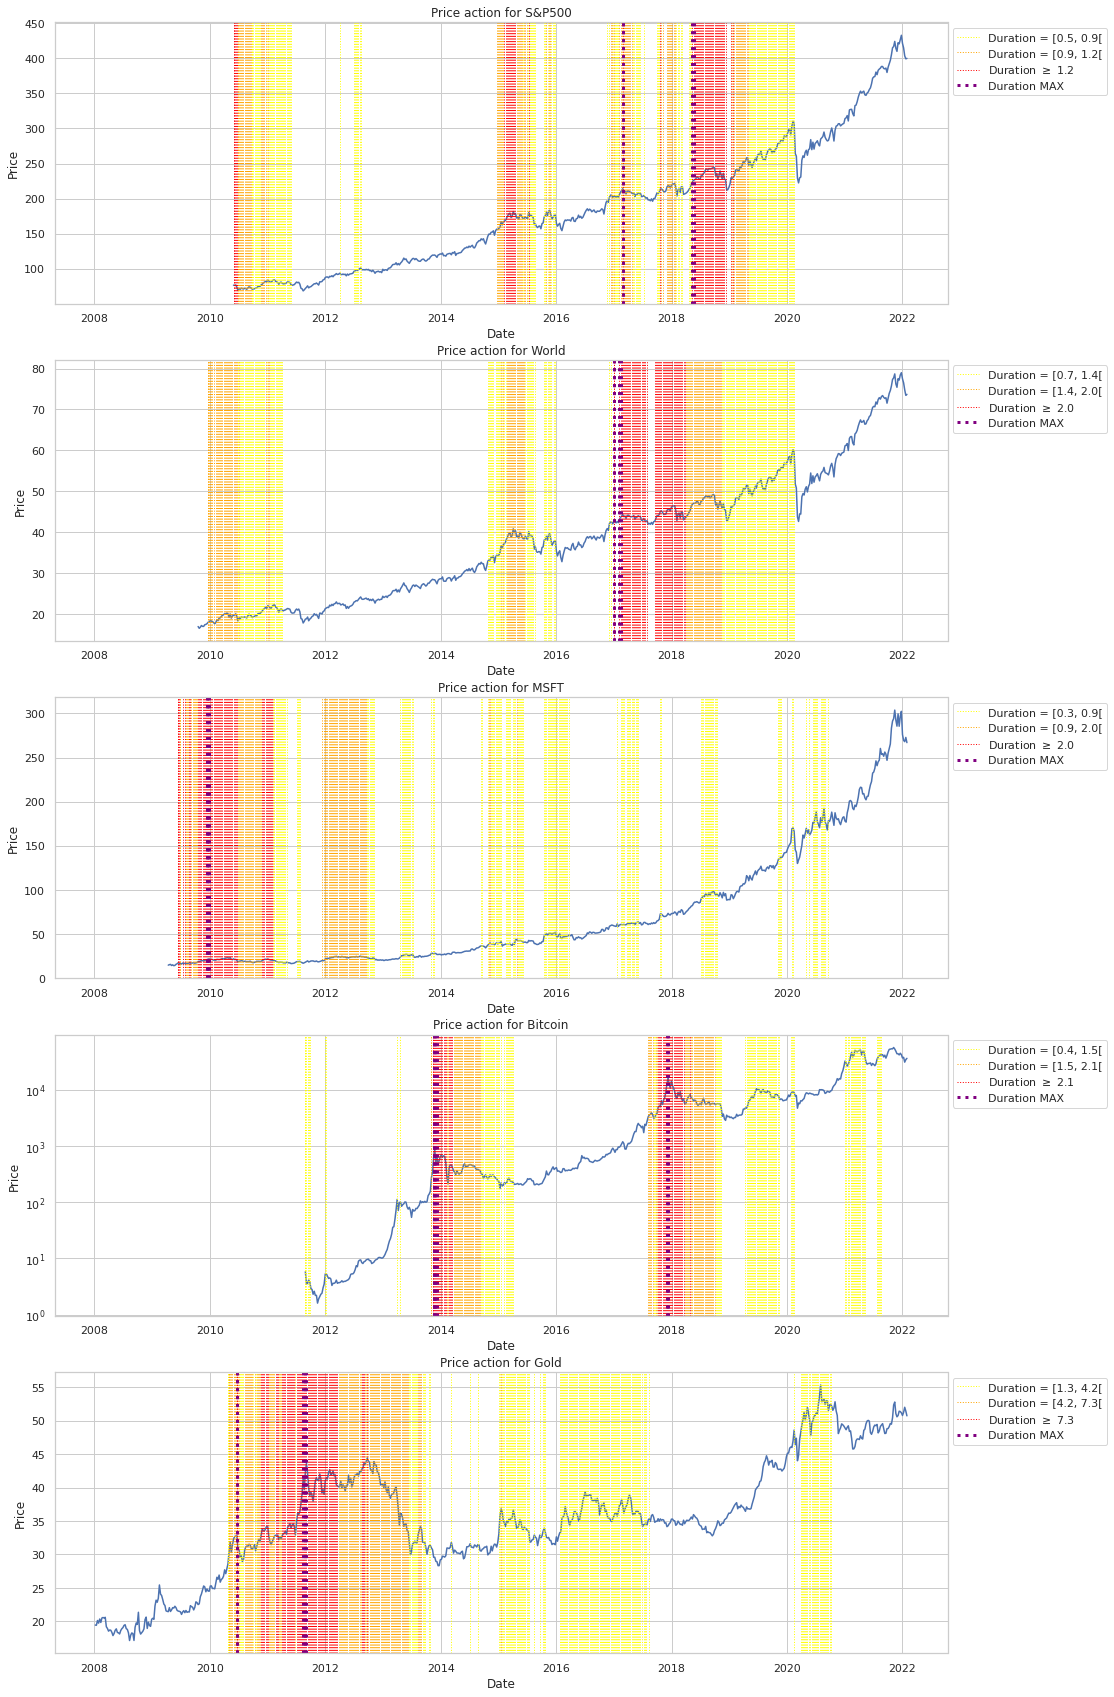

In [30]:
df_wperf = df_roi[(df_roi['ROI'] <= 0)].groupby(by=['Asset', 'Date'])['Duration'].max()

fig, ax = plt.subplots(5,1,figsize=(16,30), sharex=True)

for i, asset in zip(range(0,5), list_assets):

  ax[i].plot(df_main.loc[asset]['Date'], df_main.loc[asset]['Price'])
  if asset=='Bitcoin':
    ax[i].set_yscale('log')
  ax[i].set(xlabel='Date', ylabel='Price', title='Price action for ' + asset)

  str_median = str(round(df_wperf.loc[asset].median()/52,1))
  str_quant75 = str(round(df_wperf.loc[asset].quantile(.75)/52,1))
  str_quant90 = str(round(df_wperf.loc[asset].quantile(.9)/52,1))

  wdates = df_wperf.loc[asset][(df_wperf.loc[asset] >= df_wperf.loc[asset].median()) & (df_wperf.loc[asset] < df_wperf.loc[asset].quantile(.75))]

  xcoords = wdates.index.tolist()
  ax[i].axvline(x=xcoords[0], color='yellow', ls=':', lw=1, label = 'Duration = [' + str_median + ', ' + str_quant75 + '[')

  for xc in xcoords:
      ax[i].axvline(x=xc, color='yellow', ls=':', lw=1)

  wdates = df_wperf.loc[asset][(df_wperf.loc[asset] >= df_wperf.loc[asset].quantile(.75)) & (df_wperf.loc[asset] < df_wperf.loc[asset].quantile(.9))]

  xcoords = wdates.index.tolist()
  ax[i].axvline(x=xcoords[0], color='orange', ls=':', lw=1, label = 'Duration = [' + str_quant75 + ', ' + str_quant90 + '[')

  for xc in xcoords:
      ax[i].axvline(x=xc, color='orange', ls=':', lw=1)

  wdates = df_wperf.loc[asset][df_wperf.loc[asset] >= df_wperf.loc[asset].quantile(.9)]

  xcoords = wdates.index.tolist()
  ax[i].axvline(x=xcoords[0], color='red', ls=':', lw=1, label = r'Duration $\geq$ ' + str_quant90)

  for xc in xcoords:
      ax[i].axvline(x=xc, color='red', ls=':', lw=1)

  wdates = df_wperf.loc[asset][df_wperf.loc[asset] >= df_wperf.loc[asset].quantile(0.995)]

  xcoords = wdates.index.tolist()
  ax[i].axvline(x=xcoords[0], color='purple', ls=':', lw=3, label = r'Duration MAX')

  for xc in xcoords:
      ax[i].axvline(x=xc, color='purple', ls=':', lw=3)

  ax[i].xaxis.set_tick_params(labelbottom=True)
  ax[i].legend(bbox_to_anchor=(1.0, 1), loc='upper left')

plt.show()

Generally the worst times to enter were when the market sentiment was high and the price was on local peaks. You can see this in all assets, but especially well on Bitcoin.

For S&P500 and MSCI World, a great part of the red bands are located before the pandemic crash which resulted in a price that was last visited 1 to 2 years before. Due to the fast recover of both assets, the peak before the crash is yellow instead of red.

MSFT seems to be one of the most solid assets where other than 2010, there weren't many times where the you would take more than 1 year to recover from.

For Gold, the period around 2012 is red because the price was at all-time high, crashing between 2013 and 2014, taking a lot of time to revisit these levels. Other yellow bands are on local peaks as the other assets.

So, in order to avoid the worst time, we would have to be able to know the market sentiment. We can't really predict any crashes or whether the current price is at a local peak or not.

Let's look at the dates where there were no negative returns during the holding period.

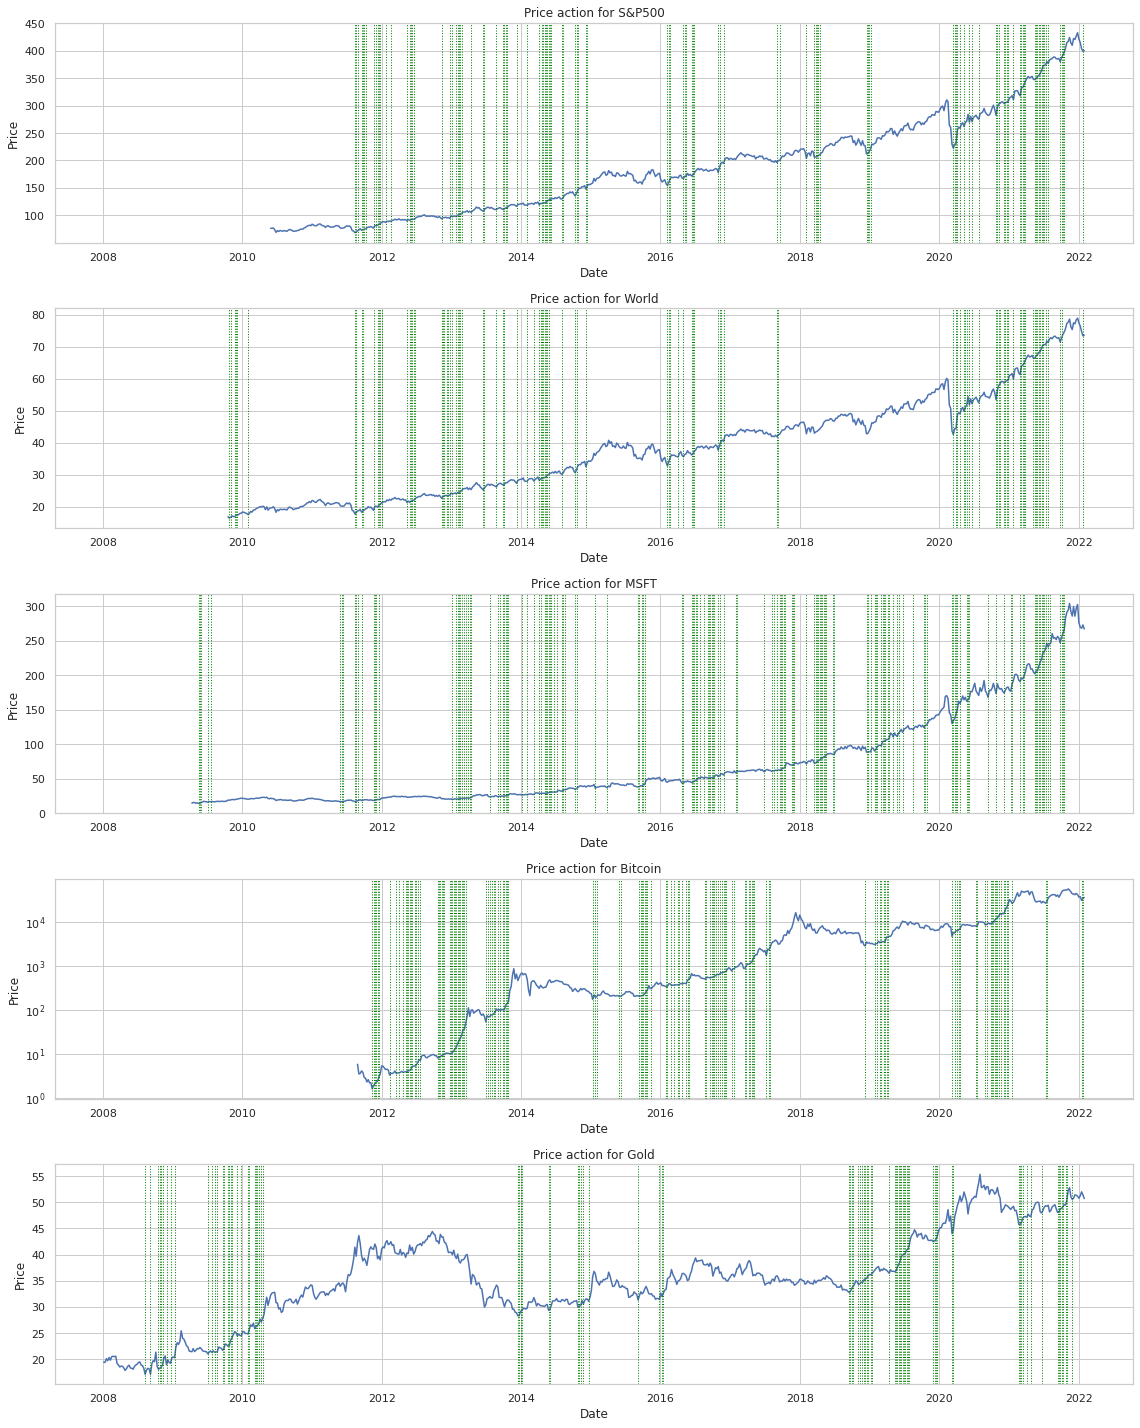

In [31]:
fig, ax = plt.subplots(5, 1, figsize=(16,20), sharex=True, tight_layout=True)

for i, asset in zip(range(0,5), list_assets):
  dates_to_drop = df_roi['Date'][(df_roi['ROI'] <= 0) & (df_roi['Asset']==asset)].tolist()
  bdates = df_roi[(~df_roi['Date'].isin(dates_to_drop)) & (df_roi['Asset'] == asset)].groupby(by='Date')['Duration'].max()
  
  ax[i].plot(df_main.loc[asset]['Date'], df_main.loc[asset]['Price'])
  if asset=='Bitcoin':
    ax[i].set_yscale('log')
  ax[i].set(xlabel='Date', ylabel='Price', title='Price action for ' + asset)
  ax[i].xaxis.set_tick_params(labelbottom=True)

  xcoords = bdates.index.tolist()
  for xc in xcoords:
    ax[i].axvline(x=xc, color='green', ls=':', lw=1)

plt.show()

On contrary to the worst dates, the best time to buy was when the market sentiment was negative, when there was a correction and the price bottomed out, before starting to raise again. 

How rare were these opportunities? We can count the number of dates where there was no negative return in any point of the holding period and calculate the ratio.

The chart below shows that you have less than 25% of probability to find the best time for entry.

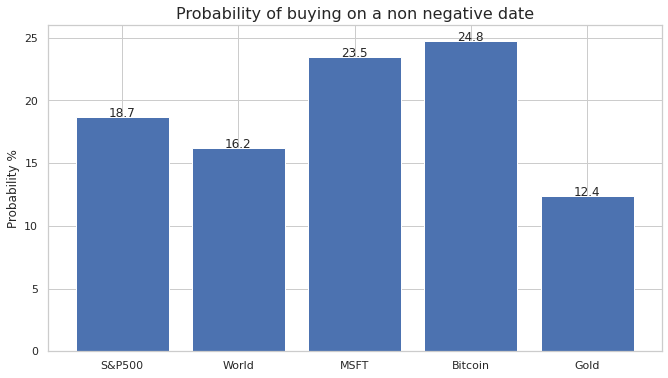

In [32]:
pdays=[]
for asset in list_assets:
  dates_to_drop = df_roi['Date'][(df_roi['ROI'] <= 0) & (df_roi['Asset']==asset)].tolist()
  bdates = df_roi[(~df_roi['Date'].isin(dates_to_drop)) & (df_roi['Asset'] == asset)].groupby(by='Date')['Duration'].max()
  totdates = df_main[(df_main['Asset'] == asset)]['Date'].count()
  pdays.append(bdates.count()/totdates*100)

f, ax = plt.subplots(figsize=(11, 6))
plt.bar(x=list_assets, height=pdays)
for i in range(5):
  ax.text(i, pdays[i], round(pdays[i],1), ha = 'center')

plt.ylabel('Probability %')
plt.title('Probability of buying on a non negative date', fontsize=16)
plt.show()



In order to find out if there is any other way to improve the probability of getting a good entry point, we'll merge the main table with the table containing the returns over different holding periods. We'll join both on the asset and date to find out if there is anything in the dates that relate with the return.

Afterwards, we'll build and analyse a correlation matrix between all the features.

To do this, first we have to do feature scaling on some of the columns for each asset separately. This is important because a change of 5% might be a normal week for bitcoin, but a really great one for S&P500. A price of 1000€ might be really high for MSCI World, but low for Bitcoin. Hence, it's important to normalize these features before checking for correlation. We'll apply standardization for the collumns `ROI`, `Annual ROI`, `Price`, `Open`, `High`, `Low`, `Vol.` and `Change  %`. 

We'll add a new collumn counting all the negative weeks each date has to check that for correlation as well.

In [33]:
asset='Gold'
nnegdays = df_roi[(df_roi['ROI']<=0) & (df_roi['Asset']==asset)].groupby(by='Date').count()['Duration']
df_corr=df_roi[df_roi['Asset']==asset].merge(df_main, how='left', on=['Date','Asset']).copy()
df_corr=df_corr.merge(nnegdays, how='left', on=['Date']).copy()
#Change name of the duplicated columns
df_corr.rename(columns={'Duration_x': 'Duration', 'Duration_y': 'Number Neg Weeks'}, inplace=True)
#Fill NaN values with 0
df_corr['Number Neg Weeks'] = df_corr['Number Neg Weeks'].fillna(0)

df_corr.groupby(by='Date').max().sort_values(by='Number Neg Weeks', ascending=False).head(10)

,Asset,Duration,ROI,Positive Return,Annual ROI,Price,Open,High,Low,Vol.,Change %,Number Neg Weeks
Date,,,,,,,,,,,,
2011-09-04,Gold,543.0,26.816411,True,2.692305,43.63,42.89,43.77,40.90,4050000,3.05,419.0
2011-08-28,Gold,544.0,30.680208,True,376.197031,42.34,40.25,42.50,39.39,1870000,6.68,395.0
2011-09-11,Gold,542.0,31.393968,True,5.254371,42.11,43.37,43.81,40.50,1580000,-3.48,390.0
2012-01-29,Gold,522.0,29.639175,True,6.265450,42.68,42.21,43.09,42.00,1210000,0.99,382.0
2012-09-23,Gold,488.0,24.589057,True,2.827587,44.41,43.72,44.41,43.46,976050,1.12,378.0
2011-11-27,Gold,531.0,31.675393,True,9.422365,42.02,41.27,42.04,41.10,768650,2.41,377.0
2011-08-14,Gold,546.0,33.582810,True,146.207939,41.42,39.01,42.22,38.66,2910000,6.07,376.0
2012-02-19,Gold,519.0,30.310881,True,7.822896,42.46,42.19,43.12,42.00,1190000,1.02,376.0
2012-01-22,Gold,523.0,30.927591,True,67.238298,42.26,41.56,42.40,40.82,801100,2.40,375.0


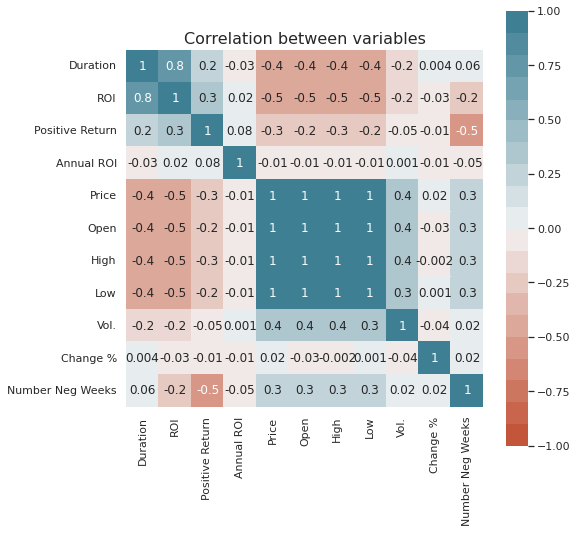

In [34]:
for asset, i in zip(list_assets, range(0,5)):
  nnegdays = df_roi[(df_roi['ROI']<=0) & (df_roi['Asset']==asset)].groupby(by='Date').count()['Duration']
  df_temp=df_roi[df_roi['Asset']==asset].merge(df_main, how='left', on=['Date','Asset']).copy()
  df_temp=df_temp.merge(nnegdays, how='left', on=['Date']).copy()
  df_temp.rename(columns={'Duration_x': 'Duration', 'Duration_y': 'Number Neg Weeks'}, inplace=True)
  df_temp['Number Neg Weeks'] = df_temp['Number Neg Weeks'].fillna(0)
  for list_columns in ['ROI', 'Annual ROI', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']:
  #applying standardization
    df_temp[list_columns] = (df_temp[list_columns]-df_temp[list_columns].mean())/df_temp[list_columns].std()
  if i==0:
    df_corr=df_temp
  else:
    df_corr=pd.concat([df_corr, df_temp])

corr=df_corr.corr()

f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=20),
    square=True, annot=True, fmt=".1g"
)
ax.set_title('Correlation between variables', fontsize=16)
plt.show()

In the end, the correlation heatmap doesn't really give us any new insights that we didn't know already. 

**Return of Investment and Duration**
>Are strongly correlated **(0.8)**. A higher holding period, translates into a higher return. 

**Price, Open, High and Low**
>It makes sense that these are correlated **(1)**, since they all follow the price of the asset. They are just snapshots taken from the price in different times of the week.

**Duration and Price**
>Have a moderate negative correlation **(-0.4)**. The dates with higher duration are the older ones and, as we know, the price grows with time. So we have dates with higher duration when the price was lower than the more recent ones where we have low duration and higher price.

**Return of Investment and Price**
>Have a moderate negative correlation **(-0.5)**. At the price of today, the return would be higher, when buying the asset at a lower price.

**Return of Investment and Volume**
>It also seems there is a week negative correlation **(-0.2)**, but whether Volume has any effect on the return is something we can't conclude for sure, since the majority of the volume in our data is located in the lower ranges, as seen in the violin plots below.

**Return of Investment and Change %**
>I was hoping to find negative correlation here **(~0)**, since dips usually are good entry opportunities - buying on a week with a negative change, would give higher returns. To my surprise there is no correlation when you look at it in a weekly timeframe and long-term.

**Number of negative weeks, ROI and Price %**
>An higher return of investment might help reduce the number of negative weeks in the holding period, hence a weak correlation **(-0.2)**. We can't predict whether the return will be higher or lower on a certain date, but we can look at the price. There seems to be a weak correlation **(0.3)** between the number of negative weeks and the price. The data suggests that the higher the Price, the higher the number of negative weeks, which could result from buying on local highs as seen before, although it might not be a result from a rally - high percentual change in price - due to no correlation  with Change % **(~0)**.

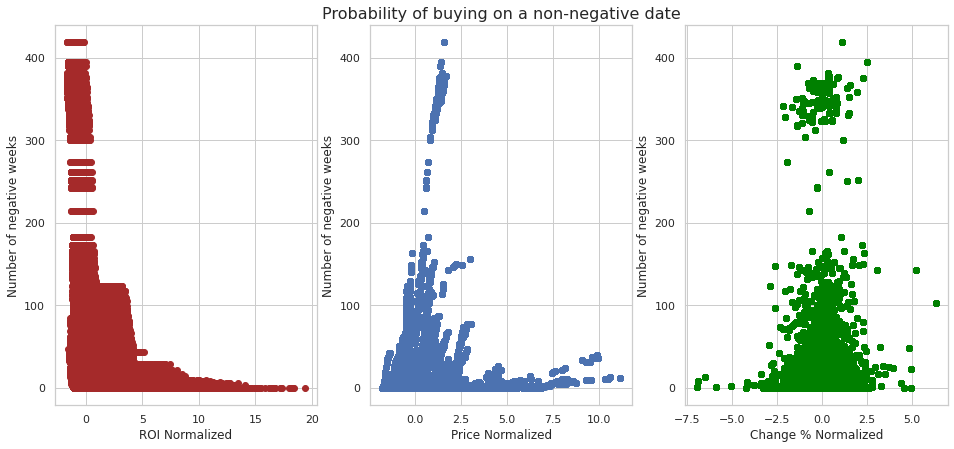

In [35]:
f, ax = plt.subplots(1, 3, figsize=(16, 7))

ax[0].scatter(x=df_corr['ROI'], y=df_corr['Number Neg Weeks'], color='brown')
ax[1].scatter(x=df_corr['Price'], y=df_corr['Number Neg Weeks'])
ax[2].scatter(x=df_corr['Change %'], y=df_corr['Number Neg Weeks'], color='green')

ax[0].set(xlabel='ROI Normalized', ylabel='Number of negative weeks')
# ax[0].set_title('Probability of buying on a non negative date', fontsize=16)

ax[1].set(xlabel='Price Normalized', ylabel='Number of negative weeks')
ax[1].set_title('Probability of buying on a non-negative date', fontsize=16)

ax[2].set(xlabel='Change % Normalized', ylabel='Number of negative weeks')
# ax[2].set_title('Probability of buying on a non negative date', fontsize=16)

plt.show()

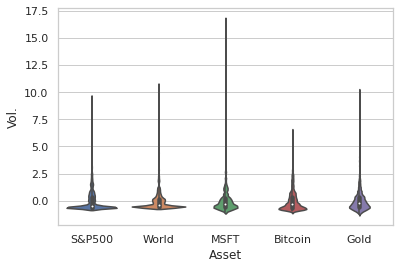

In [36]:
sns.violinplot(x=df_corr['Asset'], y=df_corr['Vol.'])
plt.show()



---


## **Conclusions**

**Important note:**

*   *Gold in this analysis is being penalized a lot due to its devaluation between 2013 and 2014, which took quite some time to recover. If the other assets had such a similar sever crash, the results could have been different.*

*   *Conclusions taken here are from the 5 assets in study. Data could've been a little different considering different assets.*


### **Time to breakeven**
>In the worst case, **S&P500 is the fastest to breakeven** (1.8 years), followed by Bitcoin, MSCI World and Microsoft (3.2-3.3 years) and **Gold being the slowest** (8.3 years).

>Except Gold, in the first year, **the probability of having a negative return** ranges between **7.5 to 17.6%**. **Up to 7.7%** in the second year and **up to 2.7%** in the third.




### **Annualized Return and Profitability**
>**Annualized Return overtime will tend to the median** of the data. This could serve as good way to assess and predict an asset return.

>**Immediate volatility** will not matter in the long haul. The compound effect helps atenuating it.

>**Bitcoin has the highest annualized return** (128.5%), followed by Microsoft (26%), S&P500 (15.6%), MSCI World (12%) and the least profitable asset was Gold (5.5%).

### **Beating Inflation (up to 7%)**
>**Bitcoin is the assets that best handled with the inflation**. Breakeven duration considering several levels of inflation was not much affected compared to the breakeven without inflation (~3). This is due to its high annual yield.

>For the other assets, there was an increase of **1 year** for Microsoft and **3 to 4 years** for S&P500 and MSCI World.

>The risk for all assets except Gold **decreases relatively quickly** and gets **under the 10% in less than 3 years**, while Gold has a more unpredictable risk.

>Gold had the highest duration for any level of inflation (8 to 14 years), not able to beat 7% without zero risk (>40%) due to a lower median. It's the riskier asset to use to beat inflation.

>Except Gold, you have relatively good chances (6.5% risk, so 93.5% sucess) of beating inflation up to 7% by the fourth year and close to 100% chances from the sixth year onwards. 

### **How to avoid high lengths of time to breakeven**
>There is no golden rule, since it's difficult to know where the markets are heading and if there is a correction/crash eminent. It seems that the best option is avoiding entering when the market sentiment is high and greedy and the price is on local peaks and try to look for the times when the market sentiment is low and fearful and the price is on local bottoms.

>The probability of blindigly entering on a non-negative return period ranges between 12.6 and 24.8%.



---


## **Wrapping up**

Nothing can guarantee that your investment doesn't go to negative, but time in the market really has shown its results - the longer the holding period, the better the return of investment and closer you'll be to breakeven. 

Given enough time, you'll get closer and closer to a steady annual return with the help of compounding. Expect to have some negative days within the first 2 to 3 years, you just have to hold on during these bad and red times. It's something that could take not days, weeks nor months, but years, but once the good and green days finally come, you'll be happy that you did.



---



***Disclaimer:*** *Nothing written here is financial advice. Past performance does not guarantee future results.*